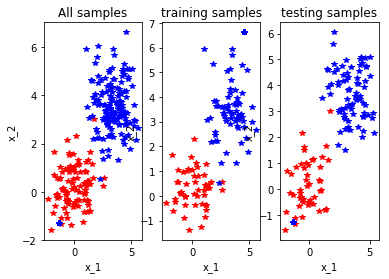

gradient descent average error: 0.4289940828402367 (0.4949324799690366)
sklearn average error: 0.46982248520710057 (0.4990884867445094)

Gradient Descent: 

	Prediction 0	Prediction 1
True 0	 25 		 25
True 1	 0 		 80
accuracy:  0.8076923076923077
precision for 0:  1.0
precision for 1:  0.7619047619047619
recall for 0:  0.5
recall for 1:  1.0

sk learn: 

	Prediction 0	Prediction 1
True 0	 48 		 2
True 1	 0 		 80
accuracy:  0.9846153846153847
precision for 0:  1.0
precision for 1:  0.975609756097561
recall for 0:  0.96
recall for 1:  1.0


In [16]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel



def func_calConfusionMatrix(predY, trueY):
    total_predictions = {}
    total_right = {}
    total_actuals = {}
    accurate_pred = 0;
    for i, j in zip(predY, trueY):
        if i in total_predictions:
            total_predictions[i] += 1
        else:
            total_predictions[i] = 1
        
        if j[0] in total_actuals:
            total_actuals[j[0]] += 1
        else:
            total_actuals[j[0]] = 1
            
        if i == j[0]:
            accurate_pred += 1
            if i in total_right:
                total_right[i] += 1
            else:
                total_right[i] = 1
        else:
            continue
            
    false_zero = total_actuals[0] - total_right[0]
    false_one = total_actuals[1] - total_right[1]
    print("\tPrediction 0\tPrediction 1")
    print("True 0\t", total_right[0], "\t\t", false_zero)
    print("True 1\t", false_one, "\t\t", total_right[1])
    
    precisions = {}
    recalls = {}
    for key in total_predictions:
        recall = total_right[key]/total_actuals[key]
        precision = total_right[key]/total_predictions[key]
        recalls[key] = recall
        precisions[key] = precision
    
    accuracy = accurate_pred/len(predY)
    return accuracy, precisions, recalls



# util.py
##implementation of sigmoid function
def Sigmoid(x):
    g = float(1.0 / float((1.0 + math.exp(-1.0*x))))
    return g

##Prediction function
def Prediction(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)


# implementation of cost functions
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    m = len(Y)
    for i in range(m):
        xi = X[i]
        est_yi = Prediction(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(est_yi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-est_yi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    #print 'cost is ', J 
    return J

 
# gradient components called by Gradient_Descent()

def Cost_Function_Derivative(X, Y, theta, j, m, alpha):
    sumErrors = 0
    m = len(Y)
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Prediction(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
#     m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

# execute gradient updates over thetas
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        deltaF = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - deltaF
        new_theta.append(new_theta_value)
    return new_theta




# getDataSet.py


# this script is used to generate a set of random data points for classification problems. 


def getDataSet():
    """
    Returns X (250 X 2) and Y (250 X 1)
    """
    # Step 1: Generate data by a module
    n = 100  # 1st class contains N objects
    alpha = 1.5  # 2st class contains alpha*N ones
    sig2 = 1  # assume 2nd class has the same variance as the 1st
    dist2 = 4

    # later we move this piece of code in a separate file
    # [X, y] = loadModelData(N, alpha, sig2, dist2);
    n2 = math.floor(alpha * n)  # calculate the size of the 2nd class
    cls1X = np.random.randn(n, 2)  # generate random objects of the 1st class

    # generate a random distance from the center of the 1st class to the center of the 2nd
    # https://stackoverflow.com/questions/1721802/what-is-the-equivalent-of-matlabs-repmat-in-numpy
    a = np.array([[math.sin(math.pi * random.random()), math.cos(math.pi * random.random())]])
    a1 = a * dist2
    shiftClass2 = np.kron(np.ones((n2, 1)), a1)

    # generate random objects of the 2nd class
    cls2X = sig2 * np.random.randn(n2, 2) + shiftClass2
    # combine the objects
    X = np.concatenate((cls1X, cls2X), axis=0)

    # assign class labels: 0s and 1s
    y = np.concatenate((np.zeros((cls1X.shape[0], 1)), np.ones((cls2X.shape[0], 1))), axis=0)
    # end % of module.
    return X, y    


#main_part1.py


# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# step 1: generate dataset that includes both positive and negative samples,
# where each sample is described with two features.
# 250 samples in total.

[X, y] = getDataSet()  # note that y contains only 1s and 0s,

# create figure for all charts to be placed on so can be viewed together
fig = plt.figure()


def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    # no more variables are needed
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_title(titleMessage)


# plotting all samples
func_DisplayData(X, y, 1, 'All samples')

# number of training samples
nTrain = 120

######################PLACEHOLDER 1#start#########################
# write you own code to randomly pick up nTrain number of samples for training and use the rest for testing.
# WARNIN: 

maxIndex = len(X)
randomTrainingSamples = np.random.choice(maxIndex, nTrain, replace=False)

trainX, trainY, testX, testY = ([] for i in range(4))

for i in range(0, len(randomTrainingSamples)):
    trainX.append(X[randomTrainingSamples[i]]) # training samples
    trainY.append(y[randomTrainingSamples[i]]) # labels of training samples    nTrain X 1

for i in range(0, maxIndex):
    if i not in randomTrainingSamples:
        testX.append(X[i]) # testing samples 
        testY.append(y[i]) # labels of testing samples     nTest X 1

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

####################PLACEHOLDER 1#end#########################

# plot the samples you have pickup for training, check to confirm that both negative
# and positive samples are included.
func_DisplayData(trainX, trainY, 2, 'training samples')
func_DisplayData(testX, testY, 3, 'testing samples')

# show all charts
plt.show()


#  step 2: train logistic regression models


######################PLACEHOLDER2 #start#########################
# in this placefolder you will need to train a logistic model using the training data: trainX, and trainY.
# please delete these coding lines and use the sample codes provided in the folder "codeLogit"

# use sklearn class
clf = LogisticRegression()
# call the function fit() to train the class instance
clf.fit(trainX, np.ravel(trainY))

theta = [0,0] #initial model parameters
alpha = 0.01 # learning rates
max_iteration = 2000 # maximal iterations

m = len(y) # number of samples

for x in range(max_iteration):
    # call the functions for gradient descent method
    new_theta = Gradient_Descent(trainX, trainY, theta, m, alpha)
    theta = new_theta
    if x % 200 == 0:
        # calculate the cost function with the present theta
        Cost_Function(trainX, trainY, theta, m)

######################PLACEHOLDER2 #end #########################


# step 3: Use the model to get class labels of testing samples.
 

######################PLACEHOLDER3 #start#########################

# codes for making prediction, 
# with the learned model, apply the logistic model over testing samples
# hatProb is the probability of belonging to the class 1.

predictions = []
for i in range(0, len(testX)):
    predictions.append(round(Prediction(theta , testX[i])))
yHat = np.array(predictions)

sk_predictions = clf.predict(testX)


######################PLACEHOLDER 3 #end #########################


# step 4: evaluation
# compare predictions yHat and and true labels testy to calculate average error and standard deviation
gdYDiff = np.abs(yHat - testY)
skYDiff = np.abs(sk_predictions - testY)

gdAvgErr = np.mean(gdYDiff)
gdStdErr = np.std(gdYDiff)
skAvgErr = np.mean(skYDiff)
skStdErr = np.std(skYDiff)

print('gradient descent average error: {} ({})'.format(gdAvgErr, gdStdErr))
print('sklearn average error: {} ({})'.format(skAvgErr, skStdErr))

print("\nGradient Descent: \n")
gd_accuracy, gd_precisions, gd_recalls = func_calConfusionMatrix(yHat, testY)

print("accuracy: ", gd_accuracy)
print("precision for 0: ", gd_precisions[0])
print("precision for 1: ", gd_precisions[1])
print("recall for 0: ", gd_recalls[0])
print("recall for 1: ", gd_recalls[1])

print("\nsk learn: \n")
sk_accuracy, sk_precisions, sk_recalls = func_calConfusionMatrix(sk_predictions, testY)

print("accuracy: ", sk_accuracy)
print("precision for 0: ", sk_precisions[0])
print("precision for 1: ", sk_precisions[1])
print("recall for 0: ", sk_recalls[0])
print("recall for 1: ", sk_recalls[1])

# score = 0
# # accuracy for sklearn
# scikit_score = clf.score(testX, testY)
# length = len(testX)
# for i in range(length):
#     if yHat[i] == testY[i]:
#         score += 1

# gd_score = float(score) / float(length)

# print('sklearn score: {}'.format(scikit_score))
# print('gradient descent score: {}'.format(gd_score))
